In [1]:
import networkx as nx
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

from openqaoa.problems.problem import MaximumCut

from openqaoa.workflows.optimizer import QAOA
from openqaoa.utilities import ground_state_hamiltonian
from openqaoa.devices import create_device

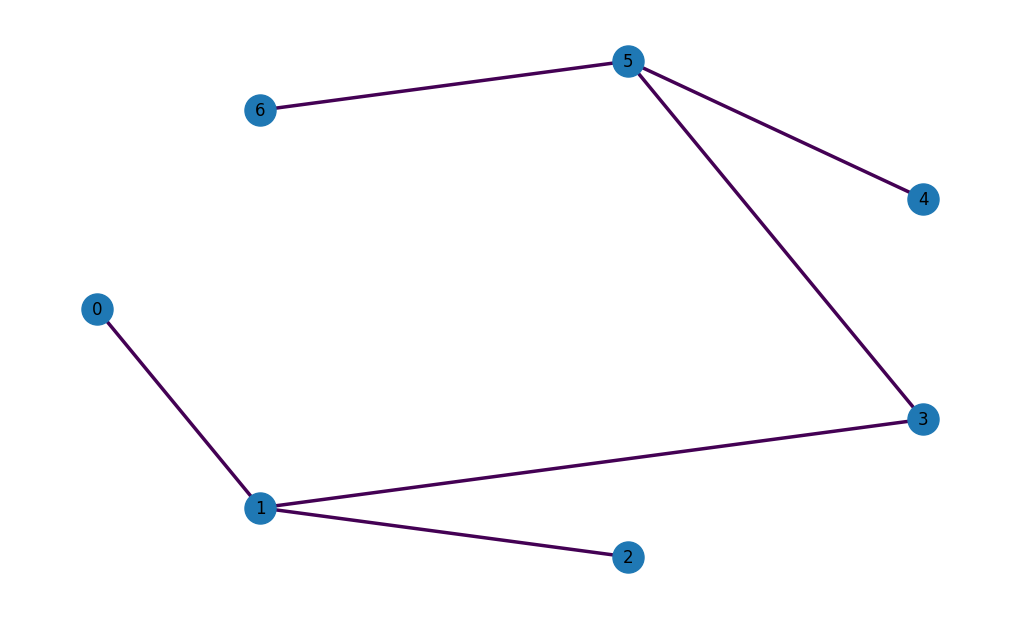

In [2]:
g = nx.Graph()
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(4, 5)
g.add_edge(3, 5)
g.add_edge(5, 6)

from openqaoa.utilities import plot_graph
plot_graph(g)

In [3]:
maxcut_prob = MaximumCut(g)

maxcut_qubo = maxcut_prob.get_qubo_problem()

In [4]:
hamiltonian = maxcut_qubo.hamiltonian

energy, configuration = ground_state_hamiltonian(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

Ground State energy: -6.0, Solution: ['0100010', '1011101']


In [5]:
q_sv = QAOA()

qiskit_sv = create_device(location='local', name='qiskit.statevector_simulator')
q_sv.set_device(qiskit_sv)

q_sv.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                           variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

q_sv.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_sv.compile(maxcut_qubo)

In [31]:
q_shot = QAOA()

qiskit_shot = create_device(location='local', name='qiskit.qasm_simulator')
q_shot.set_device(qiskit_shot)

q_shot.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

q_shot.set_backend_properties(n_shots=1024, seed_simulator=None)

q_shot.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)
#q_shot.set_classical_optimizer(method='spsa', jac='grad_spsa', maxiter=200, cost_progress=True, parameter_log=True)


q_shot.compile(maxcut_qubo)

In [7]:
q_sv.optimize()

in opt
-2.8611960225187485e-17 end
in opt
-2.1640319294256533e-17 end
in opt
-2.1640319294256533e-17 end
in opt
3.9318996316974154e-17 end
in opt
3.9318996316974154e-17 end
in opt
-0.9453532746167832 end
in opt
0.8833032451339856 end
in opt
-0.7786087819782687 end
in opt
1.075719660604393 end
in opt
-1.7933892977067805 end
in opt
1.565483338405997 end
in opt
-1.5880475351545629 end
in opt
-2.005968909309738 end
in opt
-1.452317824032734 end
in opt
-0.7330921939410341 end
in opt
-2.976325453098853 end
in opt
-1.7727179797706858 end
in opt
-1.744766958455045 end
in opt
-3.386634035017912 end
in opt
-2.732655323550053 end
in opt
-3.2455567572024786 end
in opt
-3.857737618372136 end
in opt
-3.971676489284089 end
in opt
-3.9755690878543435 end
in opt
-4.228486951053593 end
in opt
-4.172110802711364 end
in opt
-4.107652197646584 end
in opt
-4.273269007359109 end
in opt
-4.1990085136841975 end
in opt
-4.286524082996516 end
in opt
-4.298077595577543 end
in opt
-4.254075201283051 end
in opt
-4.

In [32]:
q_shot.optimize()

in opt
0.1171875 end
in opt
0.08984375 end
in opt
0.09375 end
in opt
1.384765625 end
in opt
-0.037109375 end
in opt
-1.423828125 end
in opt
1.619140625 end
in opt
-1.80078125 end
in opt
0.283203125 end
in opt
-1.767578125 end
in opt
1.40234375 end
in opt
-1.59765625 end
in opt
0.7578125 end
in opt
-1.822265625 end
in opt
-2.0078125 end
in opt
-2.115234375 end
in opt
-1.9765625 end
in opt
-2.146484375 end
in opt
-1.81640625 end
in opt
-2.138671875 end
in opt
-2.533203125 end
in opt
-2.6875 end
in opt
-2.599609375 end
in opt
-2.578125 end
in opt
-2.50390625 end
in opt
-2.796875 end
in opt
-2.82421875 end
in opt
-2.634765625 end
in opt
-2.640625 end
in opt
-2.814453125 end
in opt
-2.81640625 end
in opt
-2.82421875 end
in opt
-2.681640625 end
in opt
-2.8046875 end
in opt
-2.716796875 end
in opt
-2.724609375 end
in opt
-2.802734375 end
in opt
-2.77734375 end
in opt
-2.796875 end
in opt
-2.66015625 end
in opt
-2.921875 end
in opt
-2.54296875 end
in opt
-2.642578125 end
in opt
-2.798828125 en

In [71]:
results_sv = q_sv.results
results_shot = q_shot.results

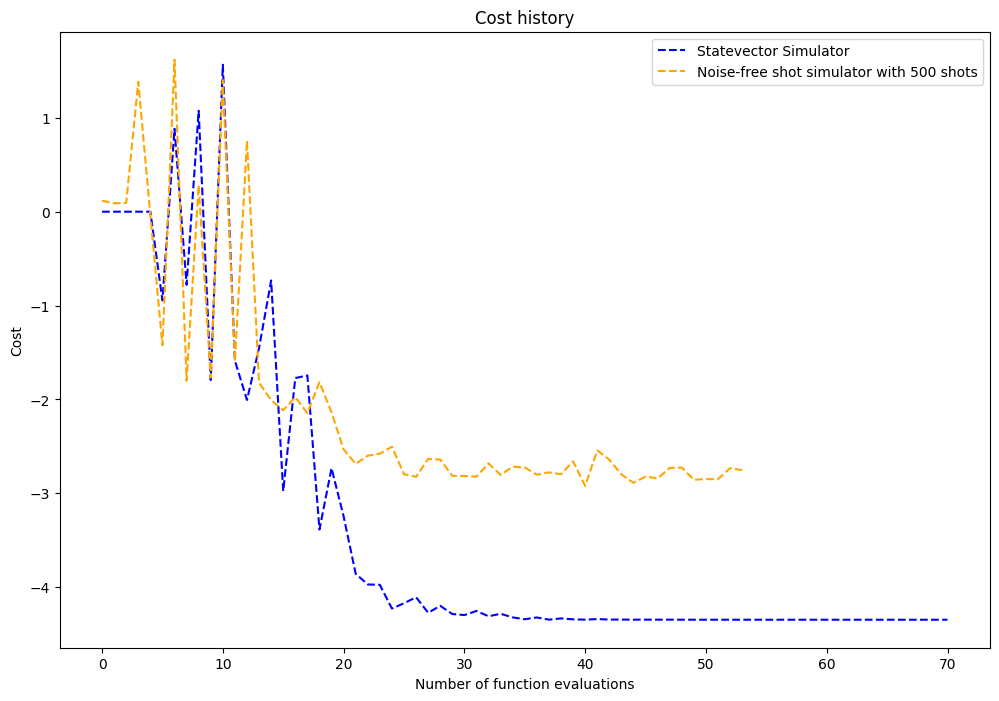

In [34]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

results_sv.plot_cost(ax=ax, label='Statevector Simulator')
results_shot.plot_cost(ax=ax, color='orange', label='Noise-free shot simulator with 500 shots')

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService, Options

In [63]:
service = QiskitRuntimeService()

In [64]:
service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_oslo')>]

In [65]:
backend_simulator = "ibmq_qasm_simulator"
backend_real = "ibm_perth"

In [35]:
options = Options()
options.resilience_level = 0 # No mitigation
options.execution.shots = 1000

In [36]:
q_runtime_sim = QAOA()

run_sim = create_device(location='runtime', name=backend_simulator, service=service, options=options)
q_runtime_sim.set_device(run_sim)

q_runtime_sim.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

#q_runtime_sim.set_backend_properties(n_shots=200, seed_simulator=None)

q_runtime_sim.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_runtime_sim.compile(maxcut_qubo)

In [38]:
q_runtime_sim.optimize()

in opt
0.068 end
in opt
-0.07400000000000001 end
in opt
-0.036000000000000004 end
in opt
1.426 end
in opt
-0.07400000000000001 end
in opt
-1.7279999999999998 end
in opt
2.024 end
in opt
-1.908 end
in opt
-0.29800000000000004 end
in opt
-0.8640000000000001 end
in opt
-2.4080000000000004 end
in opt
-0.954 end
in opt
-1.53 end
in opt
0.204 end
in opt
-2.678 end
in opt
-2.428 end
in opt
-2.408 end
in opt
-2.33 end
in opt
-2.456 end
in opt
-2.342 end
in opt
-2.7479999999999998 end
in opt
-2.578 end
in opt
-2.62 end
in opt
-2.712 end
in opt
-2.746 end
in opt
-2.528 end
in opt
-2.644 end
in opt
-2.606 end
in opt
-2.734 end
in opt
-2.678 end
in opt
-2.772 end
in opt
-2.782 end
in opt
-2.686 end
in opt
-2.678 end
in opt
-2.758 end
in opt
-2.62 end
in opt
-2.648 end
in opt
-2.756 end
in opt
-2.71 end
in opt
-2.6100000000000003 end
in opt
-2.6719999999999997 end
in opt
-2.7060000000000004 end
in opt
-2.82 end
in opt
-2.7819999999999996 end
in opt
-2.5780000000000003 end
in opt
-2.6020000000000003

In [39]:
runtime_sim_results = q_runtime_sim.results

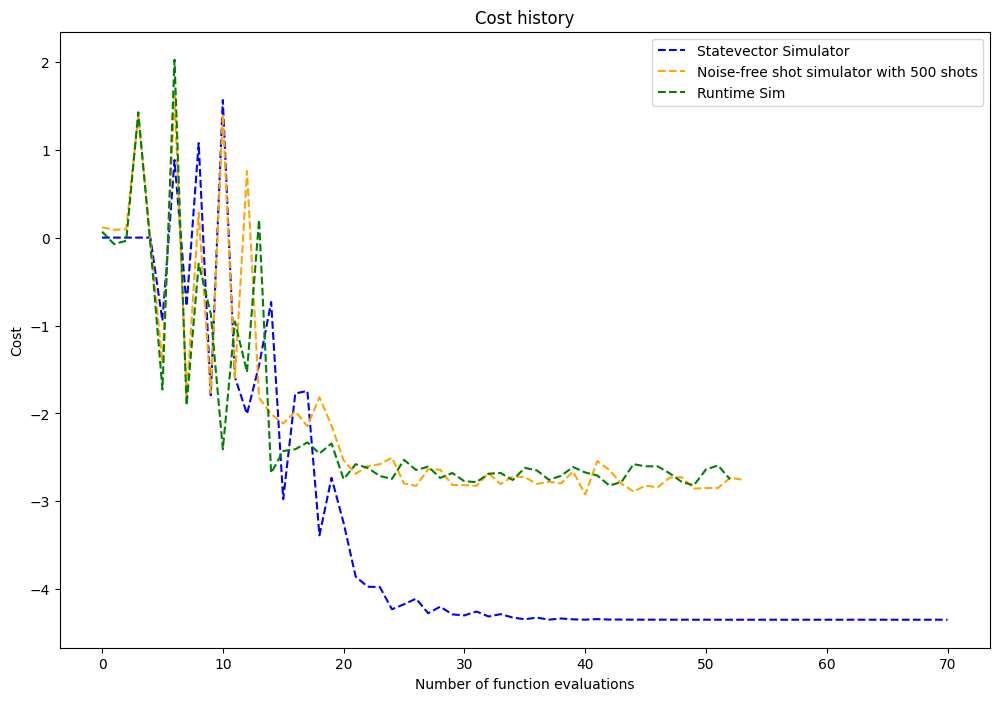

In [40]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

results_sv.plot_cost(ax=ax, label='Statevector Simulator')
results_shot.plot_cost(ax=ax, color='orange', label='Noise-free shot simulator with 500 shots')
runtime_sim_results.plot_cost(ax=ax, color='green', label='Runtime Sim')

In [15]:
options = Options()
options.resilience_level = 0
options.execution.shots = 1024

In [16]:
q_runtime_hardware = QAOA()

run_hard = create_device(location='runtime', name=backend_real, service=service, options=options)
q_runtime_hardware.set_device(run_hard)

q_runtime_hardware.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

q_runtime_hardware.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_runtime_hardware.compile(maxcut_qubo)

In [17]:
options = Options()
options.resilience_level = 1
options.execution.shots = 1024

In [18]:
q_runtime_hardware1 = QAOA()

run_hard = create_device(location='runtime', name=backend_real, service=service, options=options)
q_runtime_hardware1.set_device(run_hard)

q_runtime_hardware1.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

q_runtime_hardware1.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_runtime_hardware1.compile(maxcut_qubo)

In [19]:
options = Options()
options.resilience_level = 2
options.execution.shots = 1024

In [20]:
q_runtime_hardware2 = QAOA()

run_hard = create_device(location='runtime', name=backend_real, service=service, options=options)
q_runtime_hardware.set_device(run_hard)

q_runtime_hardware2.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})


q_runtime_hardware2.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_runtime_hardware2.compile(maxcut_qubo)

In [61]:
options = Options()
options.resilience_level = 3
options.execution.shots = 1024

In [62]:
q_runtime_hardware3 = QAOA()

run_hard = create_device(location='runtime', name=backend_real, service=service, options=options)
q_runtime_hardware3.set_device(run_hard)

q_runtime_hardware3.set_circuit_properties(p=2, param_type='standard', init_type='custom', mixer_hamiltonian='x',
                             variational_params_dict={'betas': [0, 0], 'gammas': [0, 0]})

#q_runtime_sim.set_backend_properties(n_shots=200, seed_simulator=None)

q_runtime_hardware3.set_classical_optimizer(method='COBYLA', maxiter=200, cost_progress=True, parameter_log=True)

q_runtime_hardware3.compile(maxcut_qubo)

In [23]:
q_runtime_hardware.optimize()

in opt
0.025390625 end
in opt
0.017578125 end
in opt
0.048828125 end
in opt
1.13671875 end
in opt
-0.005859375 end
in opt
-1.0703125 end
in opt
0.748046875 end
in opt
-0.841796875 end
in opt
-1.0390625 end
in opt
-0.951171875 end
in opt
-1.318359375 end
in opt
0.078125 end
in opt
-1.31640625 end
in opt
-1.078125 end
in opt
-1.109375 end
in opt
-1.193359375 end
in opt
-1.267578125 end
in opt
-1.326171875 end
in opt
-1.458984375 end
in opt
-1.328125 end
in opt
-1.353515625 end
in opt
-1.544921875 end
in opt
-1.14453125 end
in opt
-1.47265625 end
in opt
-1.291015625 end
in opt
-1.615234375 end
in opt
-1.302734375 end
in opt
-1.474609375 end
in opt
-1.6484375 end
in opt
-1.701171875 end
in opt
-1.568359375 end
in opt
-1.3125 end
in opt
-1.41796875 end
in opt
-1.47265625 end
in opt
-1.81640625 end
in opt
-1.533203125 end
in opt
-1.50390625 end
in opt
-1.58984375 end
in opt
-1.603515625 end
in opt
-1.69921875 end
in opt
-1.685546875 end
in opt
-1.677734375 end
in opt
-1.71875 end
in opt
-1.5

In [24]:
q_runtime_hardware1.optimize()

in opt
0.1047655505288323 end
in opt
-0.061830574671085506 end
in opt
0.09327309401981601 end
in opt
1.2782964999666433 end
in opt
0.04351150854693664 end
in opt
-1.0320608617944216 end
in opt
1.867367236753214 end
in opt
0.3778168296760805 end
in opt
-1.6211234192692765 end
in opt
-1.5591636992568056 end
in opt
-1.1434386548885351 end
in opt
-0.46358080992857087 end
in opt
-1.2750315117268354 end
in opt
-1.4577212760364808 end
in opt
-1.3430588186590522 end
in opt
-1.4512103306459172 end
in opt
-1.3320397876511518 end
in opt
-1.5984430180429485 end
in opt
-1.723012642504623 end
in opt
-1.5880171392425801 end
in opt
-1.2649795043148375 end
in opt
-1.3328719254243364 end
in opt
-1.575351790446044 end
in opt
-1.7432693513103112 end
in opt
-1.245809355392229 end
in opt
-1.5620272113781002 end
in opt
-1.4126632909131005 end
in opt
-1.493555982317236 end
in opt
-1.414086760793324 end
in opt
-1.5464026973025382 end
in opt
-1.265382605115765 end
in opt
-1.6949917454905168 end
in opt
-1.538744

In [25]:
q_runtime_hardware2.optimize()

in opt
-2.8611960225187485e-17 end
in opt
-2.1640319294256533e-17 end
in opt
-2.1640319294256533e-17 end
in opt
4.01591904301517e-16 end
in opt
4.01591904301517e-16 end
in opt
-0.15394009486181748 end
in opt
0.14514552665499741 end
in opt
-0.12590114220164134 end
in opt
-1.9400502005041598 end
in opt
-0.43413319789874727 end
in opt
-2.054611580373586 end
in opt
-2.0333150634198924 end
in opt
0.9276718063038314 end
in opt
-2.4853772753733994 end
in opt
-0.5983401539029284 end
in opt
-1.8895407272894855 end
in opt
-3.7091232556686844 end
in opt
-3.25765493026176 end
in opt
-3.810532593867352 end
in opt
-3.624628273289812 end
in opt
-3.3803019854376055 end
in opt
-3.7828784771086283 end
in opt
-4.0821434290509 end
in opt
-3.415504187030007 end
in opt
-4.2333922801537796 end
in opt
-4.250286309233415 end
in opt
-3.9624821604592273 end
in opt
-4.160349243212991 end
in opt
-4.16116426360494 end
in opt
-4.2697208632731325 end
in opt
-4.28403569282468 end
in opt
-4.257144160970496 end
in opt
-

In [66]:
q_runtime_hardware3.optimize()

in opt
0.024017755862276002 end
in opt
-0.02124372281065644 end
in opt
-0.0007661900331775093 end
in opt
0.6460025577097421 end
in opt
-0.005280875991437672 end
in opt


In [72]:
runtime_hardware_results = q_runtime_hardware.results
runtime_hardware_results1 = q_runtime_hardware1.results
runtime_hardsware_results2 = q_runtime_hardware2.results
runtime_hardware_results3 = q_runtime_hardware3.results

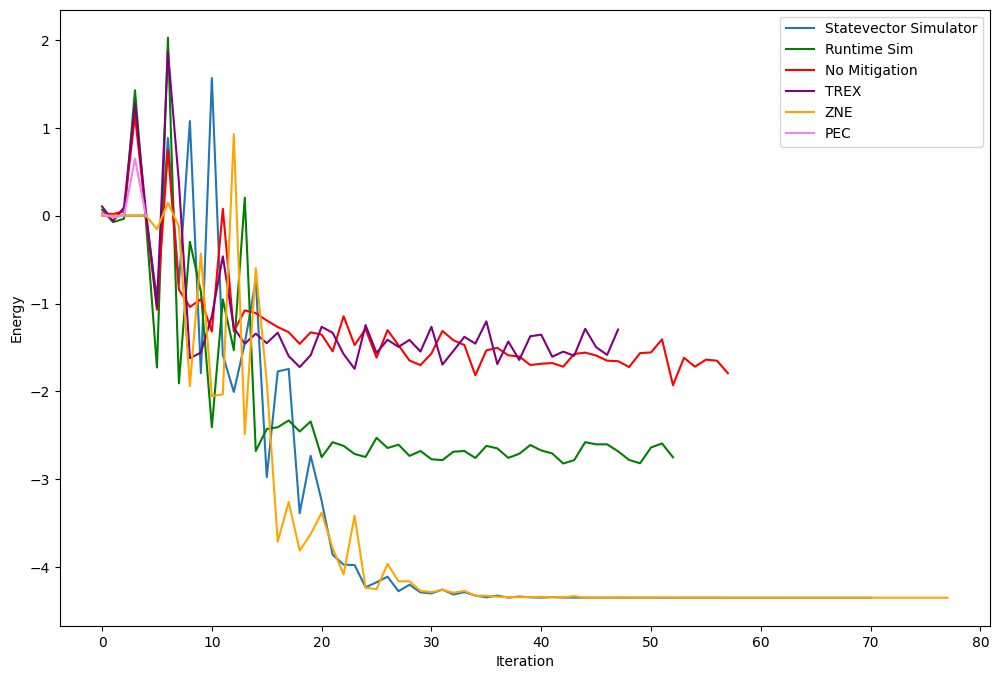

In [68]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

plt.plot(results_sv.intermediate['intermediate cost'], label='Statevector Simulator')
plt.plot(runtime_sim_results.intermediate['intermediate cost'], color='green', label='Runtime Sim')
plt.plot(runtime_hardware_results.intermediate['intermediate cost'], color='red', label='No Mitigation')
plt.plot(runtime_hardware_results1.intermediate['intermediate cost'], color='purple', label='TREX')
plt.plot(runtime_hardware_results2.intermediate['intermediate cost'], color='orange', label='ZNE')
plt.plot(runtime_hardware_results3.intermediate['intermediate cost'], color='violet', label='PEC')
plt.legend()

plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

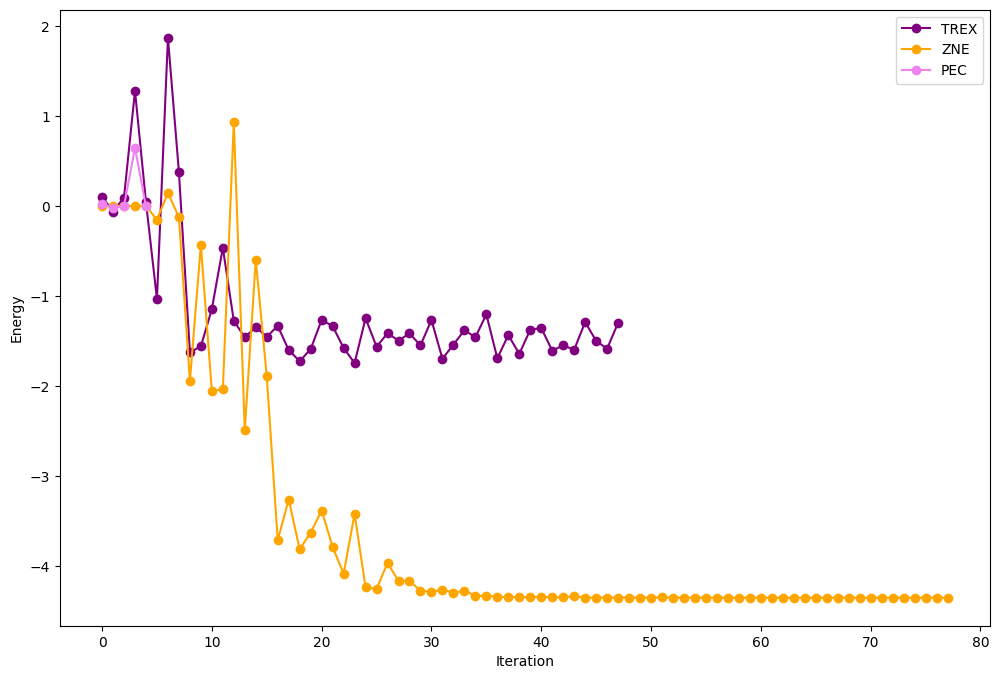

In [69]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

plt.plot(runtime_hardware_results1.intermediate['intermediate cost'], marker='o', color='purple', label='TREX')
plt.plot(runtime_hardware_results2.intermediate['intermediate cost'], marker='o', color='orange', label='ZNE')
plt.plot(runtime_hardware_results3.intermediate['intermediate cost'], marker='o', color='violet', label='PEC')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

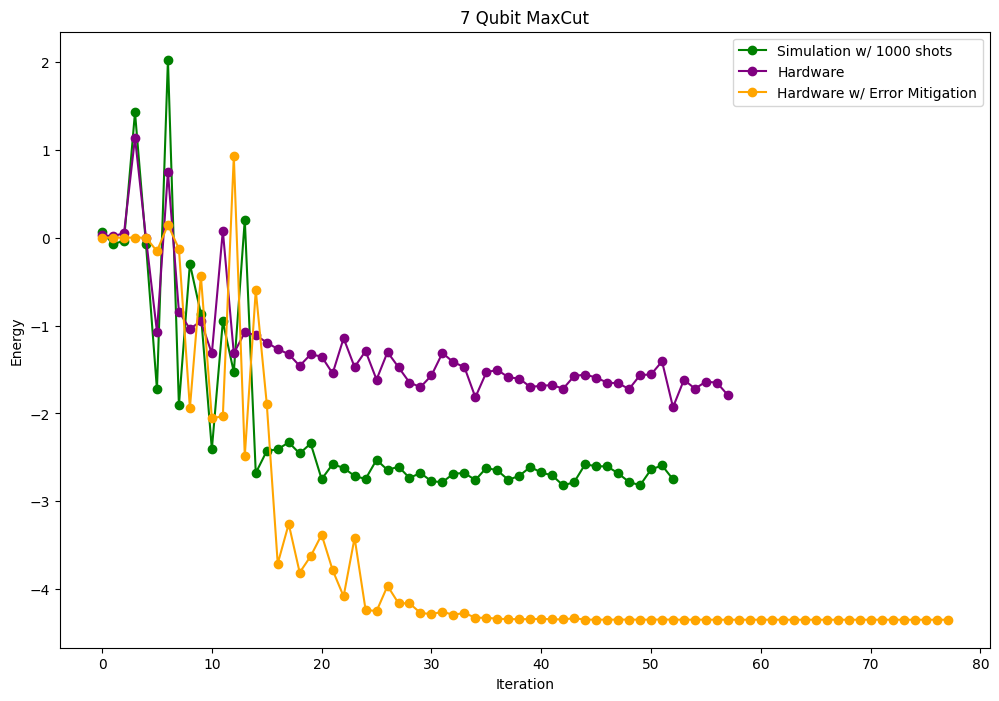

In [76]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

plt.title("7 Qubit MaxCut")
plt.plot(runtime_sim_results.intermediate['intermediate cost'], color='green', marker='o', label='Simulation w/ 1000 shots')
plt.plot(runtime_hardware_results.intermediate['intermediate cost'], marker='o', color='purple', label='Hardware')
plt.plot(runtime_hardware_results2.intermediate['intermediate cost'], marker='o', color='orange', label='Hardware w/ Error Mitigation')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()